<a href="https://colab.research.google.com/github/Amr-187/AI-ML-Bootcamp/blob/main/Malware_Detection_Amrina_Rahman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import base64
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading the Dataset**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/AI & ML Bootcamp 2024/Class 3_KNN and Naive Bayes Classifier/Copy of drebin-215-dataset-5560malware-9476-benign.csv', encoding='latin-1', on_bad_lines='skip', dtype=str)
df

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,B
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,B
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,B
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,B


**Exploratory Data Analysis**

In [ ]:
df.describe()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
count,15036,15036,15036,15036,15036,15036,15036,15036,15036,15036,...,15036,15036,15036,15036,15036,15036,15036,15036,15036,15036
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,B
freq,8624,8321,8380,8823,8346,7715,11478,10062,10790,10336,...,11528,14774,14972,8504,10016,10663,14795,14930,14360,9476


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: object(216)
memory usage: 24.8+ MB


In [ ]:
df.dtypes

,0
transact,object
onServiceConnected,object
bindService,object
attachInterface,object
ServiceConnection,object
...,...
ACCESS_FINE_LOCATION,object
SET_WALLPAPER_HINTS,object
SET_PREFERRED_APPLICATIONS,object
WRITE_SECURE_SETTINGS,object


**Checking Null Values**

In [ ]:
df.count()

,0
transact,15036
onServiceConnected,15036
bindService,15036
attachInterface,15036
ServiceConnection,15036
...,...
ACCESS_FINE_LOCATION,15036
SET_WALLPAPER_HINTS,15036
SET_PREFERRED_APPLICATIONS,15036
WRITE_SECURE_SETTINGS,15036


**Checking Null Value through Visualization**

<Axes: >

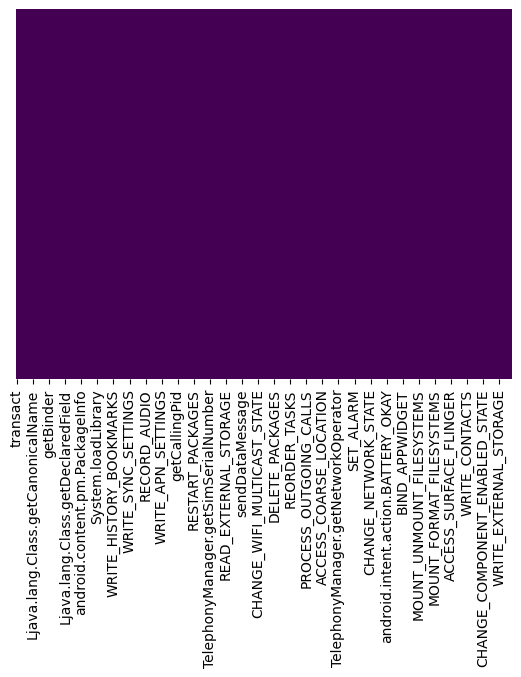

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [ ]:
df['class'].value_counts()

,count
class,
B,9476
S,5560


**Data Visualization**

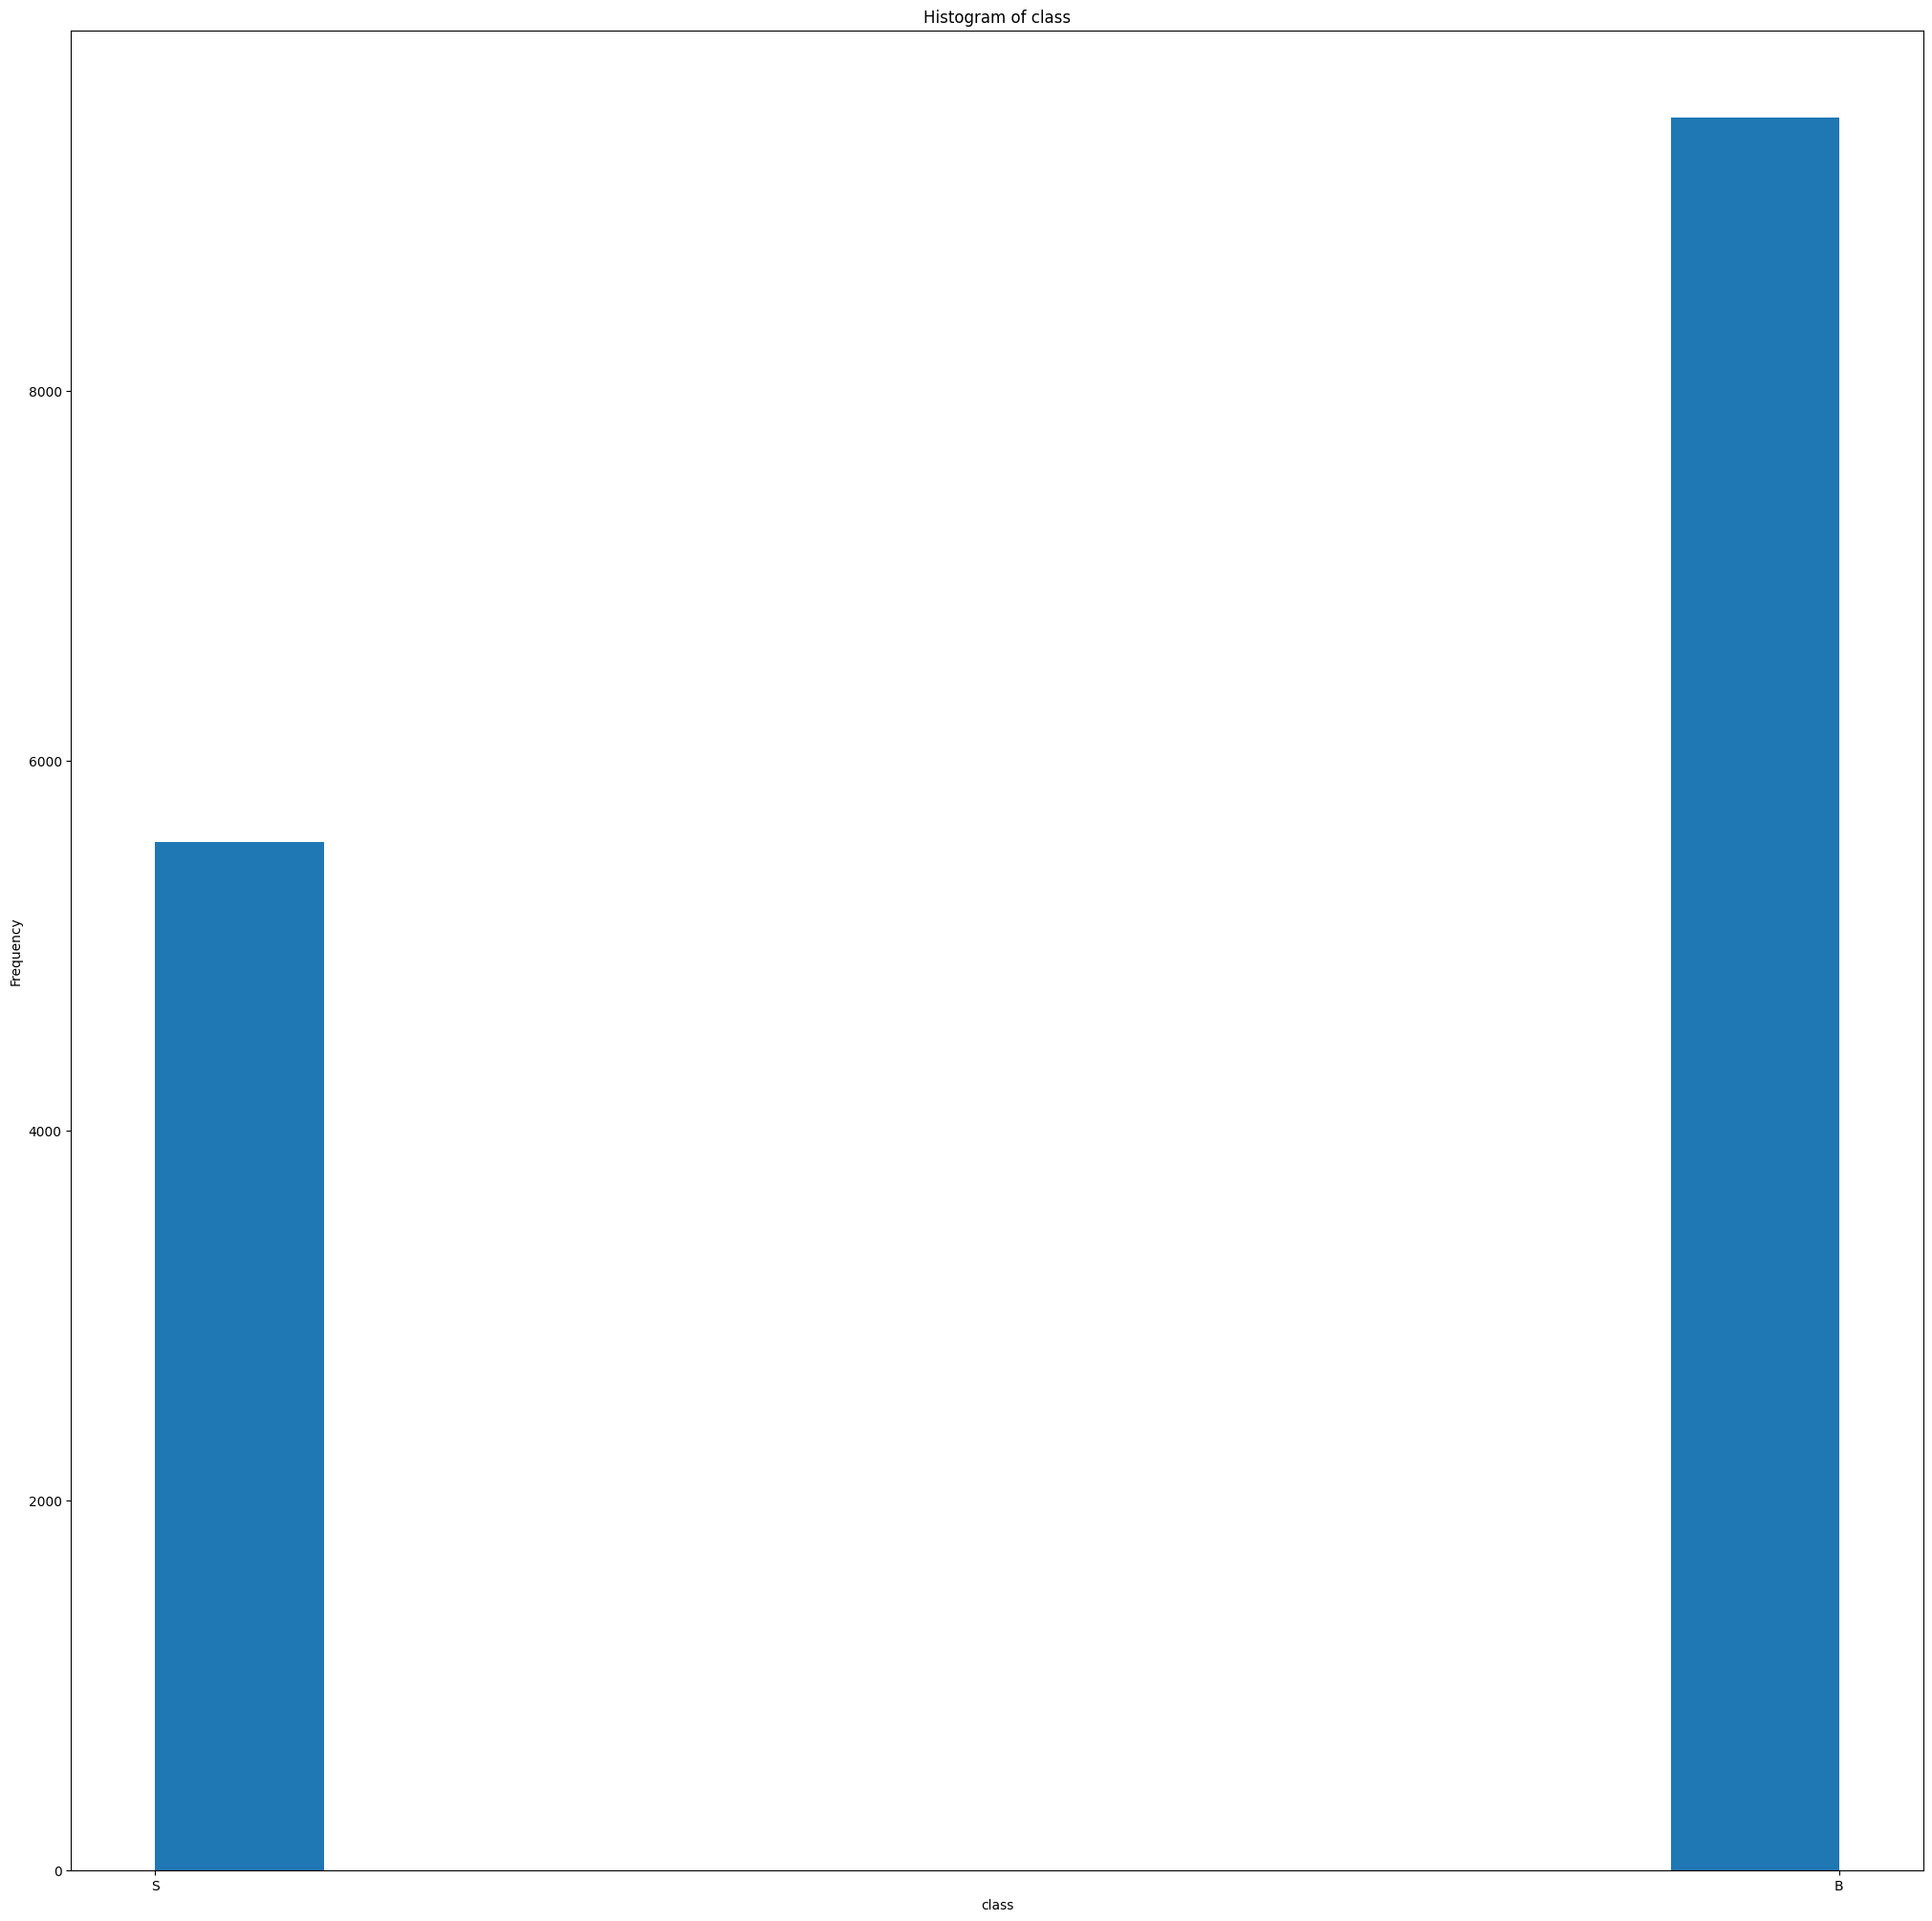

In [ ]:
plt.hist(df['class'])
plt.xlabel('class')
plt.ylabel('Frequency')
plt.title('Histogram of class')
plt.show()

In [ ]:
plt.rcParams['figure.figsize']=(25,25)
df.plot(kind='hist', bins=10, subplots=True, layout=(6,2), sharex=False, sharey=False)
plt.show()

TypeError: no numeric data to plot

In [5]:
df = pd.get_dummies(df)
df

,transact_0,transact_1,onServiceConnected_0,onServiceConnected_1,bindService_0,bindService_1,attachInterface_0,attachInterface_1,ServiceConnection_0,ServiceConnection_1,...,ACCESS_FINE_LOCATION_0,ACCESS_FINE_LOCATION_1,SET_WALLPAPER_HINTS_0,SET_WALLPAPER_HINTS_1,SET_PREFERRED_APPLICATIONS_0,SET_PREFERRED_APPLICATIONS_1,WRITE_SECURE_SETTINGS_0,WRITE_SECURE_SETTINGS_1,class_B,class_S
0,True,False,True,False,True,False,True,False,True,False,...,True,False,True,False,True,False,True,False,False,True
1,True,False,True,False,True,False,True,False,True,False,...,True,False,True,False,True,False,True,False,False,True
2,True,False,True,False,True,False,True,False,True,False,...,True,False,True,False,True,False,True,False,False,True
3,True,False,True,False,True,False,True,False,True,False,...,False,True,True,False,True,False,True,False,False,True
4,True,False,True,False,True,False,True,False,True,False,...,False,True,True,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,False,True,False,True,False,True,False,True,False,True,...,True,False,True,False,True,False,True,False,True,False
15032,True,False,True,False,True,False,True,False,True,False,...,True,False,True,False,True,False,True,False,True,False
15033,True,False,True,False,True,False,True,False,True,False,...,True,False,True,False,True,False,True,False,True,False
15034,False,True,False,True,False,True,False,True,False,True,...,False,True,True,False,True,False,True,False,True,False


**Correlation**

In [ ]:
df['class_B'].value_counts

<bound method IndexOpsMixin.value_counts of 0        False
1        False
2        False
3        False
4        False
         ...  
15031     True
15032     True
15033     True
15034     True
15035     True
Name: class_B, Length: 15036, dtype: bool>

In [6]:
df=df.astype(float)

In [7]:
df.dtypes

,0
transact_0,float64
transact_1,float64
onServiceConnected_0,float64
onServiceConnected_1,float64
bindService_0,float64
...,...
SET_PREFERRED_APPLICATIONS_1,float64
WRITE_SECURE_SETTINGS_0,float64
WRITE_SECURE_SETTINGS_1,float64
class_B,float64


In [8]:
df=df.drop(['class_S'], axis=1)


In [9]:
df

,transact_0,transact_1,onServiceConnected_0,onServiceConnected_1,bindService_0,bindService_1,attachInterface_0,attachInterface_1,ServiceConnection_0,ServiceConnection_1,...,WRITE_EXTERNAL_STORAGE_1,ACCESS_FINE_LOCATION_0,ACCESS_FINE_LOCATION_1,SET_WALLPAPER_HINTS_0,SET_WALLPAPER_HINTS_1,SET_PREFERRED_APPLICATIONS_0,SET_PREFERRED_APPLICATIONS_1,WRITE_SECURE_SETTINGS_0,WRITE_SECURE_SETTINGS_1,class_B
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
15032,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
15033,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
15034,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [10]:
correlation = df.corr()
correlation['class_B'].sort_values(ascending = False)

,class_B
class_B,1.000000
transact_1,0.570235
onServiceConnected_1,0.561192
bindService_1,0.558963
ServiceConnection_1,0.557725
...,...
android.os.Binder_0,-0.553786
ServiceConnection_0,-0.557725
bindService_0,-0.558963
onServiceConnected_0,-0.561192


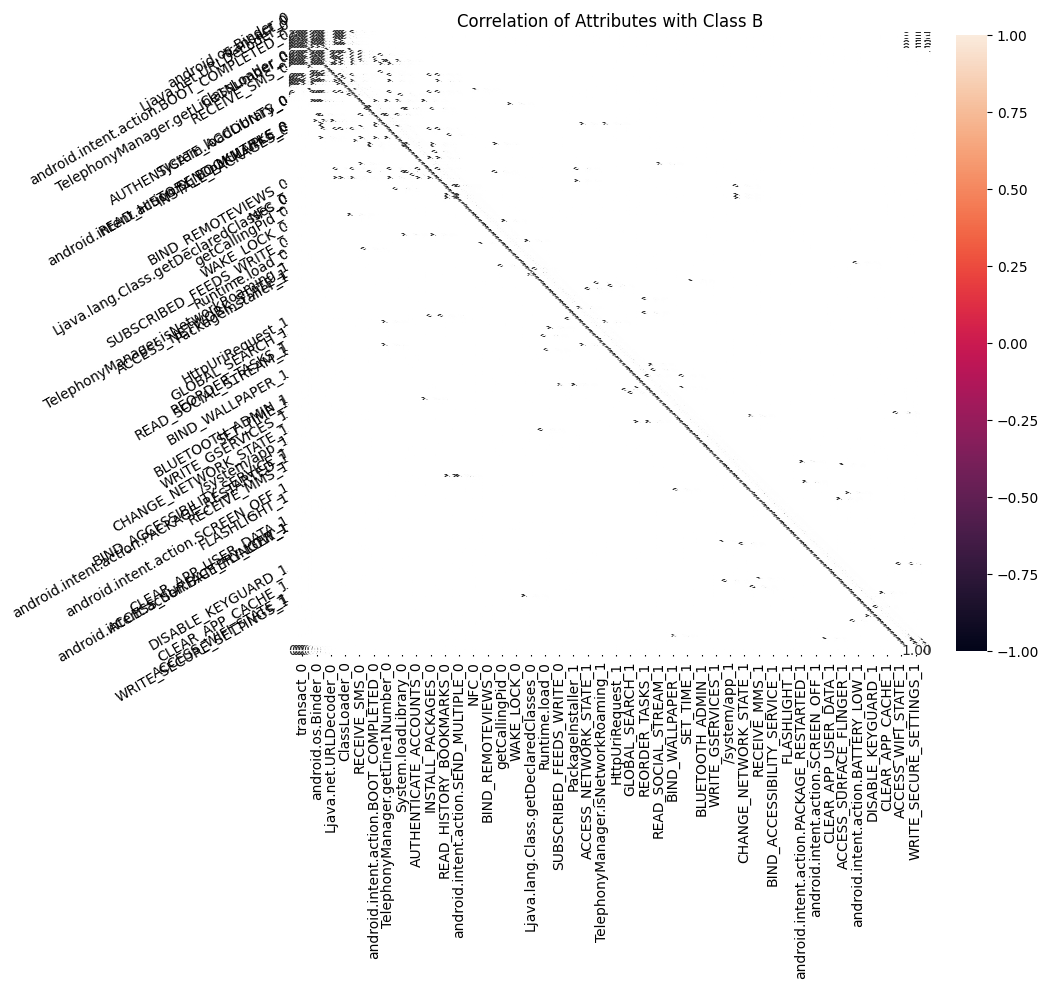

In [12]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class B')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

**Train_Test Data**

In [15]:
X=df.drop(['class_B'], axis=1)
y=df['class_B']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train, X_test, y_train, y_test

(       transact_0  transact_1  onServiceConnected_0  onServiceConnected_1  \
 6307          0.0         1.0                   0.0                   1.0   
 4342          0.0         1.0                   1.0                   0.0   
 1068          1.0         0.0                   1.0                   0.0   
 9016          0.0         1.0                   0.0                   1.0   
 4800          0.0         1.0                   1.0                   0.0   
 ...           ...         ...                   ...                   ...   
 5191          1.0         0.0                   1.0                   0.0   
 13418         0.0         1.0                   0.0                   1.0   
 5390          1.0         0.0                   1.0                   0.0   
 860           1.0         0.0                   1.0                   0.0   
 7270          0.0         1.0                   0.0                   1.0   
 
        bindService_0  bindService_1  attachInterface_0  attac

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12028, 431), (3008, 431), (12028,), (3008,))

In [19]:
X_train.dtypes

,0
transact_0,float64
transact_1,float64
onServiceConnected_0,float64
onServiceConnected_1,float64
bindService_0,float64
...,...
SET_WALLPAPER_HINTS_1,float64
SET_PREFERRED_APPLICATIONS_0,float64
SET_PREFERRED_APPLICATIONS_1,float64
WRITE_SECURE_SETTINGS_0,float64


In [21]:
X_train

,transact_0,transact_1,onServiceConnected_0,onServiceConnected_1,bindService_0,bindService_1,attachInterface_0,attachInterface_1,ServiceConnection_0,ServiceConnection_1,...,WRITE_EXTERNAL_STORAGE_0,WRITE_EXTERNAL_STORAGE_1,ACCESS_FINE_LOCATION_0,ACCESS_FINE_LOCATION_1,SET_WALLPAPER_HINTS_0,SET_WALLPAPER_HINTS_1,SET_PREFERRED_APPLICATIONS_0,SET_PREFERRED_APPLICATIONS_1,WRITE_SECURE_SETTINGS_0,WRITE_SECURE_SETTINGS_1
6307,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4342,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1068,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
9016,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4800,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
13418,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5390,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
860,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [22]:
from sklearn.preprocessing import StandardScaler
cols = X_train.columns

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [24]:
X_train

,transact_0,transact_1,onServiceConnected_0,onServiceConnected_1,bindService_0,bindService_1,attachInterface_0,attachInterface_1,ServiceConnection_0,ServiceConnection_1,...,WRITE_EXTERNAL_STORAGE_0,WRITE_EXTERNAL_STORAGE_1,ACCESS_FINE_LOCATION_0,ACCESS_FINE_LOCATION_1,SET_WALLPAPER_HINTS_0,SET_WALLPAPER_HINTS_1,SET_PREFERRED_APPLICATIONS_0,SET_PREFERRED_APPLICATIONS_1,WRITE_SECURE_SETTINGS_0,WRITE_SECURE_SETTINGS_1
0,-1.148812,1.148812,-1.10807,1.10807,-1.115173,1.115173,-1.178507,1.178507,-1.110494,1.110494,...,-0.702306,0.702306,0.644638,-0.644638,0.125327,-0.125327,0.085357,-0.085357,0.212570,-0.212570
1,-1.148812,1.148812,0.90247,-0.90247,0.896722,-0.896722,-1.178507,1.178507,0.900500,-0.900500,...,-0.702306,0.702306,0.644638,-0.644638,0.125327,-0.125327,0.085357,-0.085357,0.212570,-0.212570
2,0.870465,-0.870465,0.90247,-0.90247,0.896722,-0.896722,0.848532,-0.848532,0.900500,-0.900500,...,-0.702306,0.702306,0.644638,-0.644638,0.125327,-0.125327,0.085357,-0.085357,-4.704335,4.704335
3,-1.148812,1.148812,-1.10807,1.10807,-1.115173,1.115173,-1.178507,1.178507,-1.110494,1.110494,...,1.423880,-1.423880,-1.551258,1.551258,0.125327,-0.125327,0.085357,-0.085357,0.212570,-0.212570
4,-1.148812,1.148812,0.90247,-0.90247,0.896722,-0.896722,-1.178507,1.178507,0.900500,-0.900500,...,1.423880,-1.423880,0.644638,-0.644638,0.125327,-0.125327,0.085357,-0.085357,0.212570,-0.212570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12023,0.870465,-0.870465,0.90247,-0.90247,0.896722,-0.896722,0.848532,-0.848532,0.900500,-0.900500,...,-0.702306,0.702306,0.644638,-0.644638,0.125327,-0.125327,0.085357,-0.085357,0.212570,-0.212570
12024,-1.148812,1.148812,-1.10807,1.10807,-1.115173,1.115173,-1.178507,1.178507,-1.110494,1.110494,...,1.423880,-1.423880,0.644638,-0.644638,0.125327,-0.125327,0.085357,-0.085357,0.212570,-0.212570
12025,0.870465,-0.870465,0.90247,-0.90247,0.896722,-0.896722,0.848532,-0.848532,0.900500,-0.900500,...,-0.702306,0.702306,-1.551258,1.551258,0.125327,-0.125327,0.085357,-0.085357,0.212570,-0.212570
12026,0.870465,-0.870465,0.90247,-0.90247,0.896722,-0.896722,0.848532,-0.848532,0.900500,-0.900500,...,-0.702306,0.702306,-1.551258,1.551258,0.125327,-0.125327,0.085357,-0.085357,0.212570,-0.212570


In [25]:
X_test

,transact_0,transact_1,onServiceConnected_0,onServiceConnected_1,bindService_0,bindService_1,attachInterface_0,attachInterface_1,ServiceConnection_0,ServiceConnection_1,...,WRITE_EXTERNAL_STORAGE_0,WRITE_EXTERNAL_STORAGE_1,ACCESS_FINE_LOCATION_0,ACCESS_FINE_LOCATION_1,SET_WALLPAPER_HINTS_0,SET_WALLPAPER_HINTS_1,SET_PREFERRED_APPLICATIONS_0,SET_PREFERRED_APPLICATIONS_1,WRITE_SECURE_SETTINGS_0,WRITE_SECURE_SETTINGS_1
0,0.870465,-0.870465,0.90247,-0.90247,0.896722,-0.896722,0.848532,-0.848532,0.900500,-0.900500,...,1.423880,-1.423880,0.644638,-0.644638,0.125327,-0.125327,0.085357,-0.085357,0.212570,-0.212570
1,-1.148812,1.148812,-1.10807,1.10807,-1.115173,1.115173,-1.178507,1.178507,-1.110494,1.110494,...,-0.702306,0.702306,0.644638,-0.644638,0.125327,-0.125327,0.085357,-0.085357,0.212570,-0.212570
2,0.870465,-0.870465,0.90247,-0.90247,0.896722,-0.896722,0.848532,-0.848532,0.900500,-0.900500,...,1.423880,-1.423880,0.644638,-0.644638,0.125327,-0.125327,0.085357,-0.085357,0.212570,-0.212570
3,-1.148812,1.148812,-1.10807,1.10807,-1.115173,1.115173,-1.178507,1.178507,-1.110494,1.110494,...,1.423880,-1.423880,0.644638,-0.644638,0.125327,-0.125327,0.085357,-0.085357,0.212570,-0.212570
4,-1.148812,1.148812,-1.10807,1.10807,-1.115173,1.115173,-1.178507,1.178507,-1.110494,1.110494,...,-0.702306,0.702306,0.644638,-0.644638,0.125327,-0.125327,0.085357,-0.085357,0.212570,-0.212570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3003,0.870465,-0.870465,0.90247,-0.90247,0.896722,-0.896722,0.848532,-0.848532,0.900500,-0.900500,...,1.423880,-1.423880,0.644638,-0.644638,0.125327,-0.125327,0.085357,-0.085357,0.212570,-0.212570
3004,0.870465,-0.870465,0.90247,-0.90247,0.896722,-0.896722,0.848532,-0.848532,0.900500,-0.900500,...,-0.702306,0.702306,0.644638,-0.644638,0.125327,-0.125327,0.085357,-0.085357,0.212570,-0.212570
3005,0.870465,-0.870465,0.90247,-0.90247,0.896722,-0.896722,0.848532,-0.848532,0.900500,-0.900500,...,1.423880,-1.423880,0.644638,-0.644638,0.125327,-0.125327,0.085357,-0.085357,0.212570,-0.212570
3006,0.870465,-0.870465,0.90247,-0.90247,0.896722,-0.896722,0.848532,-0.848532,0.900500,-0.900500,...,-0.702306,0.702306,-1.551258,1.551258,0.125327,-0.125327,0.085357,-0.085357,0.212570,-0.212570


**Fitting KNN Classifiers to the Training Set**

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)


knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
y_pred = knn.predict(X_test)

In [29]:
knn.predict_proba(X_test)[:,0]

array([0., 0., 0., ..., 0., 1., 0.])

In [30]:
knn.predict_proba(X_test)[:,1]

array([1., 1., 1., ..., 1., 0., 1.])

**Accuracy of the Training Set**

In [31]:
from sklearn.metrics import accuracy_score

y_pred_train = knn.predict(X_train)
print('Accuracy Score of the Training Set: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Accuracy Score of the Training Set: 0.9909


**Accuracy of the test set**

In [32]:
print('Accuracy Score of the Test Set: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Accuracy Score of the Test Set: 0.9814


**Testing with Different K**

In [34]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)
y_pred_3 = knn_3.predict(X_test)
print('Accuracy Score of the Test Set with k=3: {0:0.4f}'. format(accuracy_score(y_test, y_pred_3)))

Accuracy Score of the Test Set with k=3: 0.9814


In [35]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)
y_pred_5 = knn_5.predict(X_test)
print('Accuracy Score of the Test Set with k=5: {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

Accuracy Score of the Test Set with k=5: 0.9811


In [36]:
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train, y_train)
y_pred_1 = knn_1.predict(X_test)
print('Accuracy Score of the Test Set with k=1: {0:0.4f}'. format(accuracy_score(y_test, y_pred_1)))

Accuracy Score of the Test Set with k=1: 0.9864


In [37]:
knn_6 = KNeighborsClassifier(n_neighbors=6)
knn_6.fit(X_train, y_train)
y_pred_6 = knn_6.predict(X_test)
print('Accuracy Score of the Test Set with k=6: {0:0.4f}'. format(accuracy_score(y_test, y_pred_6)))

Accuracy Score of the Test Set with k=6: 0.9804


In [38]:
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train, y_train)
y_pred_7 = knn_7.predict(X_test)
print('Accuracy Score of the Test Set with k=7: {0:0.4f}'. format(accuracy_score(y_test, y_pred_7)))

Accuracy Score of the Test Set with k=7: 0.9797


In [39]:
knn_8 = KNeighborsClassifier(n_neighbors=8)
knn_8.fit(X_train, y_train)
y_pred_8 = knn_8.predict(X_test)
print('Accuracy Score of the Test Set with k=8: {0:0.4f}'. format(accuracy_score(y_test, y_pred_8)))

Accuracy Score of the Test Set with k=8: 0.9764
